# App 1 Fig 1

Changing `b`

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [50]:
import pandas as pd

import seaborn as sns

from math import log

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# from xgboost import XGBRegressor
# import shap

import itertools


from plots2.fns import (
    # standard_layout,
    # corner_annotations_colwise,
    # corner_annotations_rowwise,
    # get_text_annotation,
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist
# from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
# from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

In [9]:
cf = Config(
    verbose=False, 
    n_k=300,
)

In [4]:
from math import floor

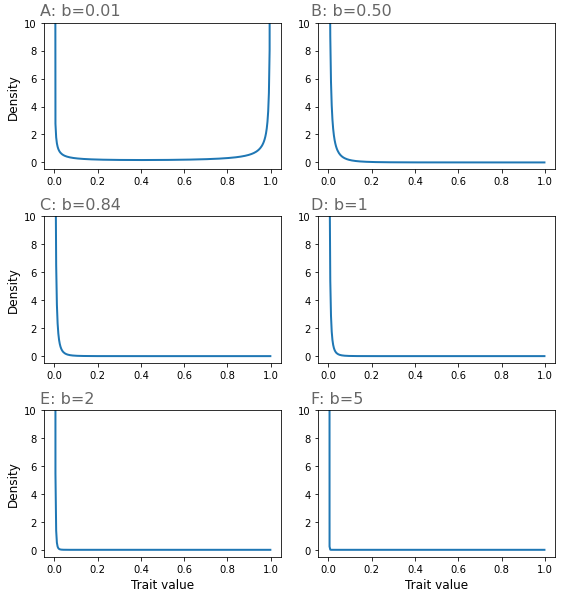

In [55]:
f, ax = plt.subplots(
    3,
    2, 
    figsize=(8,9)
)

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

tv = trait_vec(cf.n_k)

bs = [0.01, 0.5, cf.k_b, 1, 2, 5]

for ii, b in enumerate(bs):
    
    rr = floor(ii/2)
    cc = ii%2

    a = cf.k_mu*b
    yy = gamma_dist(cf.n_k, a, b)
    
    yy = yy/np.sum(yy)
    
    yy = yy / (tv[1] - tv[0])
    
    ax[rr][cc].plot(tv, yy, lw=2)
    ax[rr][cc].set_ylim([-5, 310])

f.patch.set_facecolor('white')

ax[0][0].set_xlabel(None)
ax[0][1].set_xlabel(None)
ax[1][0].set_xlabel(None)
ax[1][1].set_xlabel(None)
ax[2][0].set_xlabel('Trait value')
ax[2][1].set_xlabel('Trait value')

ax[0][0].set_ylabel('Density')
ax[1][0].set_ylabel('Density')
ax[2][0].set_ylabel('Density')
ax[0][1].set_ylabel(None)
ax[1][1].set_ylabel(None)
ax[2][1].set_ylabel(None)

plt.tight_layout(rect=[0,0,1,0.91], h_pad=3)

letters = 'ABCDEF'
labels = []
for ii in range(6):
    if ii<3:
        labels.append(f'{letters[ii]}: b={bs[ii]:.2f}')
    else:
        labels.append(f'{letters[ii]}: b={bs[ii]}')
    

    
for ii, jj in itertools.product(range(3), range(2)):
    ax[ii][jj].set_ylim([-0.5, 10])
    # ax[ii][jj].set_yscale('log')
    
get_corner_annotations_custom_labels(2, 3, 0.07, 0.9, 0.47, 0.30, plt, labels=labels)

# f

## Save

In [56]:
f.savefig('../figures/paper/app1_fig1.jpg', dpi=300, bbox_inches="tight")